In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

## Import Library dari Scikit-Learn

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, make_scorer
from sklearn.cluster import KMeans
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('PENJUALAN-ZUl-TOYS.csv')

In [4]:
df

,ID_PENJUALAN_PERBULAN,Kode,Nama,Jumlah,Sat.,Bulan,Tahun,costprice,salesprice1,Total,Margin,Total Laba,is_holiday
0,Zul-04-2023-1,013-13,super robot 013-13,13,PCS,4,2023,11125,12500,162500,0.110000,17875,True
1,Zul-12-2023-1,013-13,super robot 013-13,1,PCS,12,2023,11125,12500,12500,0.110000,1375,True
2,Zul-09-2022-1,AK 04,truk molen kontruksi ak04,10,PCS,9,2022,18500,20000,200000,0.075000,15000,False
3,Zul-10-2022-1,AK 04,truk molen kontruksi ak04,18,PCS,10,2022,18500,20000,360000,0.075000,27000,True
4,Zul-11-2022-1,AK 04,truk molen kontruksi ak04,8,PCS,11,2022,18500,20000,160000,0.075000,12000,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,Zul-12-2023-1026,zb096b,kipas angin cas 096,17,PCS,12,2023,18500,19000,323000,0.026316,8500,True
13738,Zul-01-2024-872,zb096b,kipas angin cas 096,1,PCS,1,2024,18500,19000,19000,0.026316,500,True
13739,Zul-10-2023-917,zd135,laser finger ZD135,36,PCS,10,2023,4450,5000,180000,0.110000,19800,False
13740,Zul-12-2023-1027,zd135,laser finger ZD135,17,PCS,12,2023,4450,5000,85000,0.110000,9350,True


## Persiapan Data

In [5]:
# Membuat kolom 'Tanggal' dari kolom 'Bulan' dan 'Tahun'
df['Tanggal'] = pd.to_datetime(df['Tahun'].astype(str) + '-' + df['Bulan'].astype(str), format='%Y-%m')

In [6]:
df.dtypes

ID_PENJUALAN_PERBULAN            object
Kode                             object
Nama                             object
Jumlah                            int64
Sat.                             object
Bulan                             int64
Tahun                             int64
costprice                         int64
salesprice1                       int64
Total                             int64
Margin                          float64
Total Laba                        int64
is_holiday                         bool
Tanggal                  datetime64[ns]
dtype: object

In [7]:
df.isnull().sum()

ID_PENJUALAN_PERBULAN    0
Kode                     0
Nama                     0
Jumlah                   0
Sat.                     0
Bulan                    0
Tahun                    0
costprice                0
salesprice1              0
Total                    0
Margin                   0
Total Laba               0
is_holiday               0
Tanggal                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

## EDA

In [9]:
df

,ID_PENJUALAN_PERBULAN,Kode,Nama,Jumlah,Sat.,Bulan,Tahun,costprice,salesprice1,Total,Margin,Total Laba,is_holiday,Tanggal
0,Zul-04-2023-1,013-13,super robot 013-13,13,PCS,4,2023,11125,12500,162500,0.110000,17875,True,2023-04-01
1,Zul-12-2023-1,013-13,super robot 013-13,1,PCS,12,2023,11125,12500,12500,0.110000,1375,True,2023-12-01
2,Zul-09-2022-1,AK 04,truk molen kontruksi ak04,10,PCS,9,2022,18500,20000,200000,0.075000,15000,False,2022-09-01
3,Zul-10-2022-1,AK 04,truk molen kontruksi ak04,18,PCS,10,2022,18500,20000,360000,0.075000,27000,True,2022-10-01
4,Zul-11-2022-1,AK 04,truk molen kontruksi ak04,8,PCS,11,2022,18500,20000,160000,0.075000,12000,False,2022-11-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,Zul-12-2023-1026,zb096b,kipas angin cas 096,17,PCS,12,2023,18500,19000,323000,0.026316,8500,True,2023-12-01
13738,Zul-01-2024-872,zb096b,kipas angin cas 096,1,PCS,1,2024,18500,19000,19000,0.026316,500,True,2024-01-01
13739,Zul-10-2023-917,zd135,laser finger ZD135,36,PCS,10,2023,4450,5000,180000,0.110000,19800,False,2023-10-01
13740,Zul-12-2023-1027,zd135,laser finger ZD135,17,PCS,12,2023,4450,5000,85000,0.110000,9350,True,2023-12-01


In [10]:
df_describe = df.describe().transpose()

In [11]:
df_describe

,count,mean,min,25%,50%,75%,max,std
Jumlah,13742.0,10.601441,1.0,2.0,4.0,10.0,545.0,25.397571
Bulan,13742.0,7.187455,1.0,4.0,8.0,10.0,12.0,3.751536
Tahun,13742.0,2022.87178,2022.0,2023.0,2023.0,2023.0,2024.0,0.488726
costprice,13742.0,18659.173337,1000.0,8900.0,13350.0,21360.0,427200.0,21189.670163
salesprice1,13742.0,20880.326736,1500.0,10000.0,15000.0,24000.0,480000.0,23626.800692
Total,13742.0,139786.630913,2100.0,30000.0,70000.0,156000.0,7630000.0,237330.593293
Margin,13742.0,0.10741,0.0,0.11,0.11,0.11,0.944444,0.031043
Total Laba,13742.0,14746.49869,0.0,3300.0,7260.0,16500.0,839300.0,25605.744767
Tanggal,13742,2023-05-21 17:13:31.584922368,2022-09-01 00:00:00,2023-01-01 00:00:00,2023-06-01 00:00:00,2023-10-01 00:00:00,2024-01-01 00:00:00,NaN


## Visualisasi Data

In [12]:
# Mengagregasi data penjualan per bulan
penjualan_per_bulan = df.groupby('Tanggal')['Jumlah'].sum().reset_index()

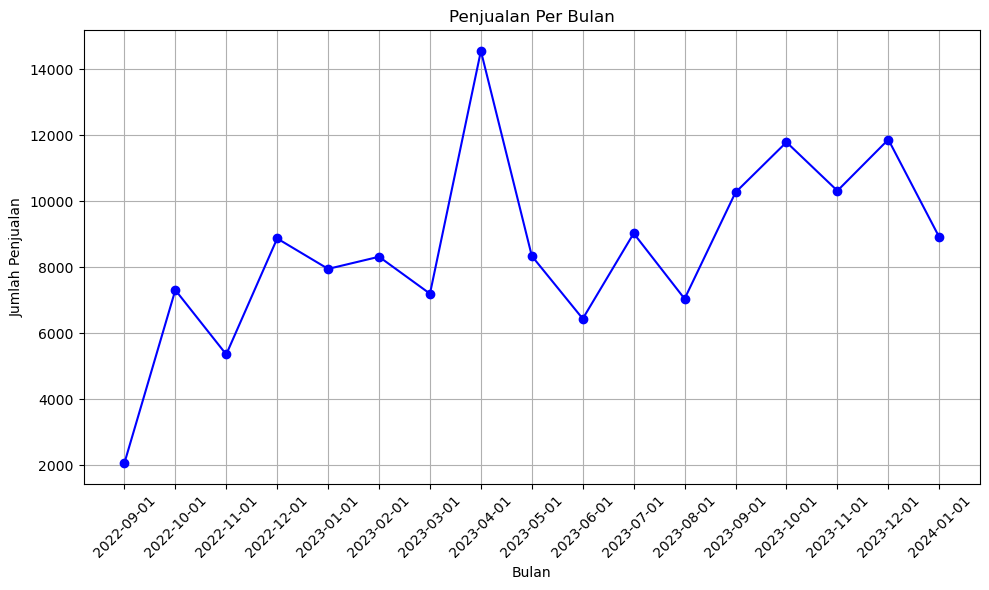

In [13]:
# Memvisualisasikan penjualan per bulan
plt.figure(figsize=(10, 6))
plt.plot(penjualan_per_bulan['Tanggal'].astype(str), penjualan_per_bulan['Jumlah'], marker='o', linestyle='-', color='b')
plt.title('Penjualan Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penjualan')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [14]:
penjualan_per_bulan.describe()

,Tanggal,Jumlah
count,17,17.000000
mean,2023-05-02 00:00:00,8569.705882
min,2022-09-01 00:00:00,2065.000000
25%,2023-01-01 00:00:00,7201.000000
50%,2023-05-01 00:00:00,8343.000000
75%,2023-09-01 00:00:00,10273.000000
max,2024-01-01 00:00:00,14560.000000
std,NaN,2817.374437


### Penambahan kolom baru apakah terjadi event awal ramadhan dan hari raya idul fitri

In [15]:
df.loc[(df['Bulan'] == 3) & (df['Tahun'] == 2023), 'Event'] = "Awal Ramadhan"
df.loc[(df['Bulan'] == 4) & (df['Tahun'] == 2023), 'Event'] = "Hari Raya Idul Fitri"

In [16]:
df['Event'].unique()

array(['Hari Raya Idul Fitri', nan, 'Awal Ramadhan'], dtype=object)

In [17]:
def one_hot_encoder(data, feature, keep_first=True):
    one_hot_cols = pd.get_dummies(data[feature], prefix='', prefix_sep='')
    
    for col in one_hot_cols.columns:
        if '_' in col:
            one_hot_cols.rename({col: col.split('_')[1]}, axis=1, inplace=True)
    
    new_data = pd.concat([data, one_hot_cols], axis=1)
    new_data.drop(feature, axis=1, inplace=True)
    
    if not keep_first:
        new_data = new_data.iloc[:, 1:]
    
    return new_data

In [18]:
df = one_hot_encoder(df, 'Event', keep_first=True)

In [19]:
df

,ID_PENJUALAN_PERBULAN,Kode,Nama,Jumlah,Sat.,Bulan,Tahun,costprice,salesprice1,Total,Margin,Total Laba,is_holiday,Tanggal,Awal Ramadhan,Hari Raya Idul Fitri
0,Zul-04-2023-1,013-13,super robot 013-13,13,PCS,4,2023,11125,12500,162500,0.110000,17875,True,2023-04-01,False,True
1,Zul-12-2023-1,013-13,super robot 013-13,1,PCS,12,2023,11125,12500,12500,0.110000,1375,True,2023-12-01,False,False
2,Zul-09-2022-1,AK 04,truk molen kontruksi ak04,10,PCS,9,2022,18500,20000,200000,0.075000,15000,False,2022-09-01,False,False
3,Zul-10-2022-1,AK 04,truk molen kontruksi ak04,18,PCS,10,2022,18500,20000,360000,0.075000,27000,True,2022-10-01,False,False
4,Zul-11-2022-1,AK 04,truk molen kontruksi ak04,8,PCS,11,2022,18500,20000,160000,0.075000,12000,False,2022-11-01,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,Zul-12-2023-1026,zb096b,kipas angin cas 096,17,PCS,12,2023,18500,19000,323000,0.026316,8500,True,2023-12-01,False,False
13738,Zul-01-2024-872,zb096b,kipas angin cas 096,1,PCS,1,2024,18500,19000,19000,0.026316,500,True,2024-01-01,False,False
13739,Zul-10-2023-917,zd135,laser finger ZD135,36,PCS,10,2023,4450,5000,180000,0.110000,19800,False,2023-10-01,False,False
13740,Zul-12-2023-1027,zd135,laser finger ZD135,17,PCS,12,2023,4450,5000,85000,0.110000,9350,True,2023-12-01,False,False


## Scatterplot Jumlah Penjualan

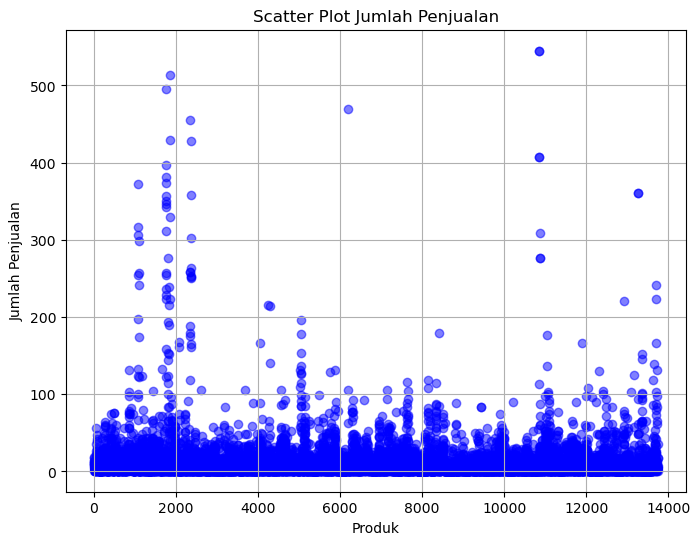

In [20]:
# Buat scatter plot
plt.figure(figsize=(8, 6))
nomor_produk = range(1, len(df['Jumlah']) + 1)  # Nomor produk atau indeks waktu
plt.scatter(nomor_produk, df['Jumlah'], color='blue', alpha=0.5)  # alpha untuk transparansi

# Tambahkan judul dan label sumbu
plt.title('Scatter Plot Jumlah Penjualan')
plt.xlabel('Produk')
plt.ylabel('Jumlah Penjualan')

# Tampilkan plot
plt.grid(True)
plt.show()

## Pengkategorian Penjualan

In [21]:
# Menggunakan K-means clustering untuk mengelompokkan perubahan penjualan
kmeans_penjualan = KMeans(n_clusters=4, random_state=42)
df['kategori_produk'] = kmeans_penjualan.fit_predict(df[['Jumlah']])

/Users/fajri/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


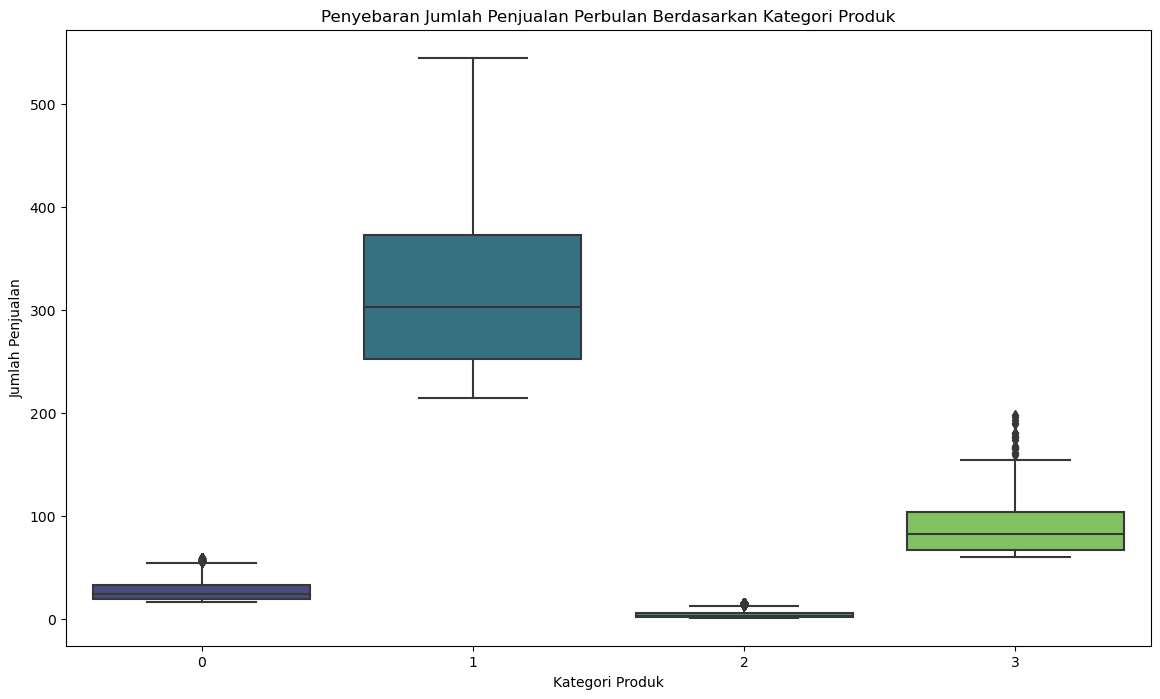

In [22]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x='kategori_produk', y='Jumlah', palette='viridis')
plt.title('Penyebaran Jumlah Penjualan Perbulan Berdasarkan Kategori Produk')
plt.xlabel('Kategori Produk')
plt.ylabel('Jumlah Penjualan')
plt.show()

In [23]:
# Menambahkan kolom baru dengan label kategori produk
cluster_labels = {0: 'Penjualan baik', 1: 'Penjualan sangat baik', 2: 'Penjualan lemah', 3: 'Penjualan cukup baik'}
df['kategori_produk'] = df['kategori_produk'].map(cluster_labels)


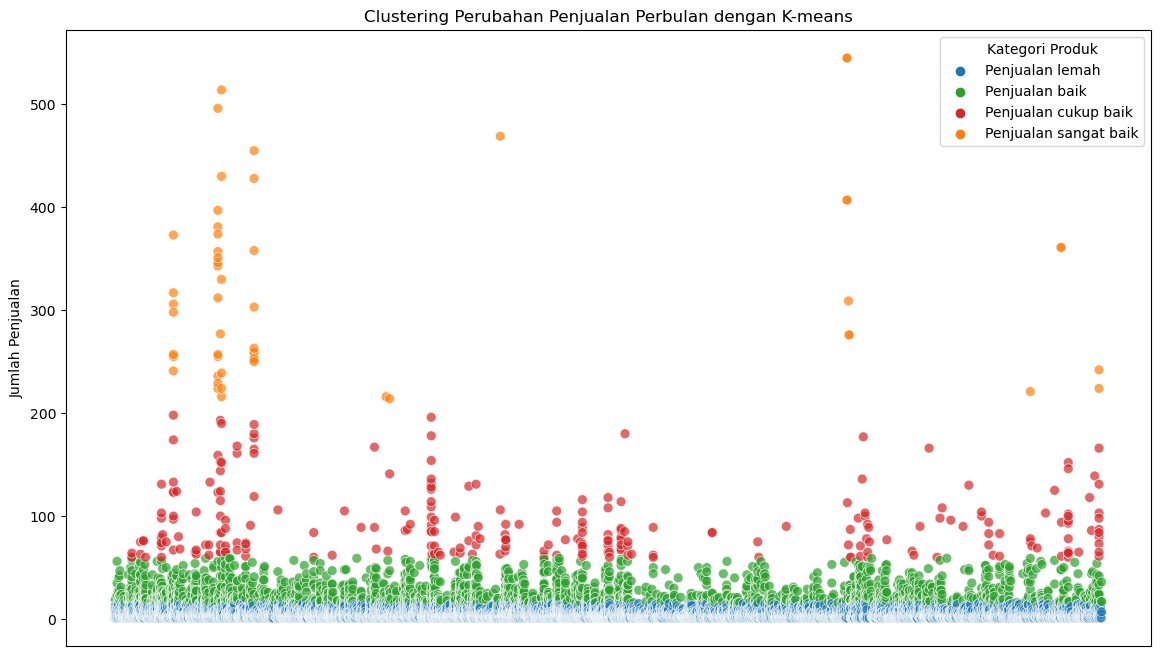

In [24]:
# Mendefinisikan palet warna kustom
custom_palette = {
    'Penjualan lemah': '#1f77b4',  # biru
    'Penjualan sangat baik': '#ff7f0e',  # oranye
    'Penjualan baik': '#2ca02c',  # hijau
    'Penjualan cukup baik': '#d62728'  # merah
}

plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Kode', y='Jumlah', hue='kategori_produk', palette=custom_palette, s=50, alpha=0.7)
plt.title('Clustering Perubahan Penjualan Perbulan dengan K-means')
plt.xlabel('Kode Produk')
plt.ylabel('Jumlah Penjualan')

# Menghilangkan sumbu X sepenuhnya
plt.gca().axes.get_xaxis().set_visible(False)

plt.legend(title='Kategori Produk')
plt.show()

In [25]:
df

,ID_PENJUALAN_PERBULAN,Kode,Nama,Jumlah,Sat.,Bulan,Tahun,costprice,salesprice1,Total,Margin,Total Laba,is_holiday,Tanggal,Awal Ramadhan,Hari Raya Idul Fitri,kategori_produk
0,Zul-04-2023-1,013-13,super robot 013-13,13,PCS,4,2023,11125,12500,162500,0.110000,17875,True,2023-04-01,False,True,Penjualan lemah
1,Zul-12-2023-1,013-13,super robot 013-13,1,PCS,12,2023,11125,12500,12500,0.110000,1375,True,2023-12-01,False,False,Penjualan lemah
2,Zul-09-2022-1,AK 04,truk molen kontruksi ak04,10,PCS,9,2022,18500,20000,200000,0.075000,15000,False,2022-09-01,False,False,Penjualan lemah
3,Zul-10-2022-1,AK 04,truk molen kontruksi ak04,18,PCS,10,2022,18500,20000,360000,0.075000,27000,True,2022-10-01,False,False,Penjualan baik
4,Zul-11-2022-1,AK 04,truk molen kontruksi ak04,8,PCS,11,2022,18500,20000,160000,0.075000,12000,False,2022-11-01,False,False,Penjualan lemah
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,Zul-12-2023-1026,zb096b,kipas angin cas 096,17,PCS,12,2023,18500,19000,323000,0.026316,8500,True,2023-12-01,False,False,Penjualan baik
13738,Zul-01-2024-872,zb096b,kipas angin cas 096,1,PCS,1,2024,18500,19000,19000,0.026316,500,True,2024-01-01,False,False,Penjualan lemah
13739,Zul-10-2023-917,zd135,laser finger ZD135,36,PCS,10,2023,4450,5000,180000,0.110000,19800,False,2023-10-01,False,False,Penjualan baik
13740,Zul-12-2023-1027,zd135,laser finger ZD135,17,PCS,12,2023,4450,5000,85000,0.110000,9350,True,2023-12-01,False,False,Penjualan baik


df.to_csv('PENJUALAN.csv',index=False)

joblib.dump(kmeans_penjualan, 'kmeans_penjualan.pkl')

## Pengkategorian Total Penjualan Secara Keseluruhan

In [26]:
# Menghitung total penjualan untuk setiap produk
total_penjualan_per_produk = df.groupby('Nama')['Total'].sum().reset_index()

# Menamai kolom total penjualan
total_penjualan_per_produk.rename(columns={'Total': 'Total_Penjualan'}, inplace=True)

In [27]:
total_penjualan_per_produk

,Nama,Total_Penjualan
0,Kipas pluit kecil,285000
1,batrei dynamax hijau,3010000
2,hulahop kecil 8 ha,220000
3,ice cream pencet,45000
4,kotak hiasan pensil,153000
...,...,...
2723,yoyo press 2021,2676000
2724,yoyo press 828G,3607500
2725,yoyo speed 2368b,66000
2726,zebra tiup,60000


In [28]:
total_penjualan_per_produk.describe()

,Total_Penjualan
count,2.728000e+03
mean,7.041598e+05
std,1.533123e+06
min,3.000000e+03
25%,1.120000e+05
50%,2.640000e+05
75%,6.617500e+05
max,2.898500e+07


In [29]:
# Mengambil 20 produk dengan total penjualan tertinggi
top_20_penjualan = total_penjualan_per_produk.nlargest(20, 'Total_Penjualan')

In [30]:
top_20_penjualan

,Nama,Total_Penjualan
2149,sekotak balon sabun,28985000
593,bola karet,20930000
1970,pop led 12 pcs,19512000
1471,lato tangkai,17730000
91,Bawang ajaib,16920000
202,Laser 3in1,14940000
1126,inai golecha,14668000
865,gambar,13356000
2673,ubur-ubur,13104000
2662,ttd 999 new truk pasir,13029500


In [31]:
from matplotlib.ticker import FuncFormatter

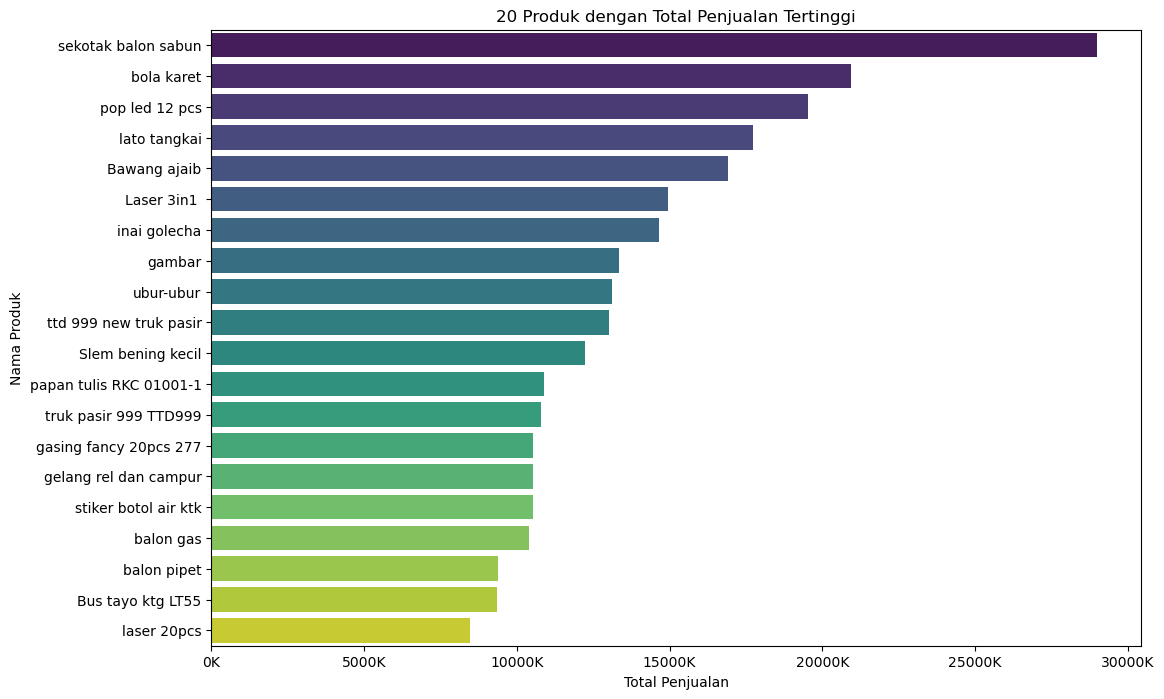

In [32]:
# Visualisasi
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Penjualan', y='Nama', data=top_20_penjualan, palette='viridis')

# Menentukan format angka pada sumbu x
formatter = FuncFormatter(lambda x, _: f'{int(x / 1000)}K')  # Format angka dalam ribuan
plt.gca().xaxis.set_major_formatter(formatter)

plt.title('20 Produk dengan Total Penjualan Tertinggi')
plt.xlabel('Total Penjualan')
plt.ylabel('Nama Produk')
plt.show()

In [33]:
# Standardisasi total penjualan
scaler = StandardScaler()
total_penjualan_per_produk['Total_Penjualan_Scaled'] = scaler.fit_transform(total_penjualan_per_produk[['Total_Penjualan']])

In [34]:
# Menentukan jumlah klaster
k = 5
kmeans_total = KMeans(n_clusters=k, n_init=10, random_state=42)  # Menetapkan n_init secara eksplisit
total_penjualan_per_produk['Cluster'] = kmeans_total.fit_predict(total_penjualan_per_produk[['Total_Penjualan_Scaled']])

joblib.dump(kmeans_total,'kmeans_total.pkl')

In [35]:
total_penjualan_per_produk

,Nama,Total_Penjualan,Total_Penjualan_Scaled,Cluster
0,Kipas pluit kecil,285000,-0.273453,0
1,batrei dynamax hijau,3010000,1.504291,2
2,hulahop kecil 8 ha,220000,-0.315858,0
3,ice cream pencet,45000,-0.430025,0
4,kotak hiasan pensil,153000,-0.359567,0
...,...,...,...,...
2723,yoyo press 2021,2676000,1.286395,2
2724,yoyo press 828G,3607500,1.894090,4
2725,yoyo speed 2368b,66000,-0.416325,0
2726,zebra tiup,60000,-0.420239,0


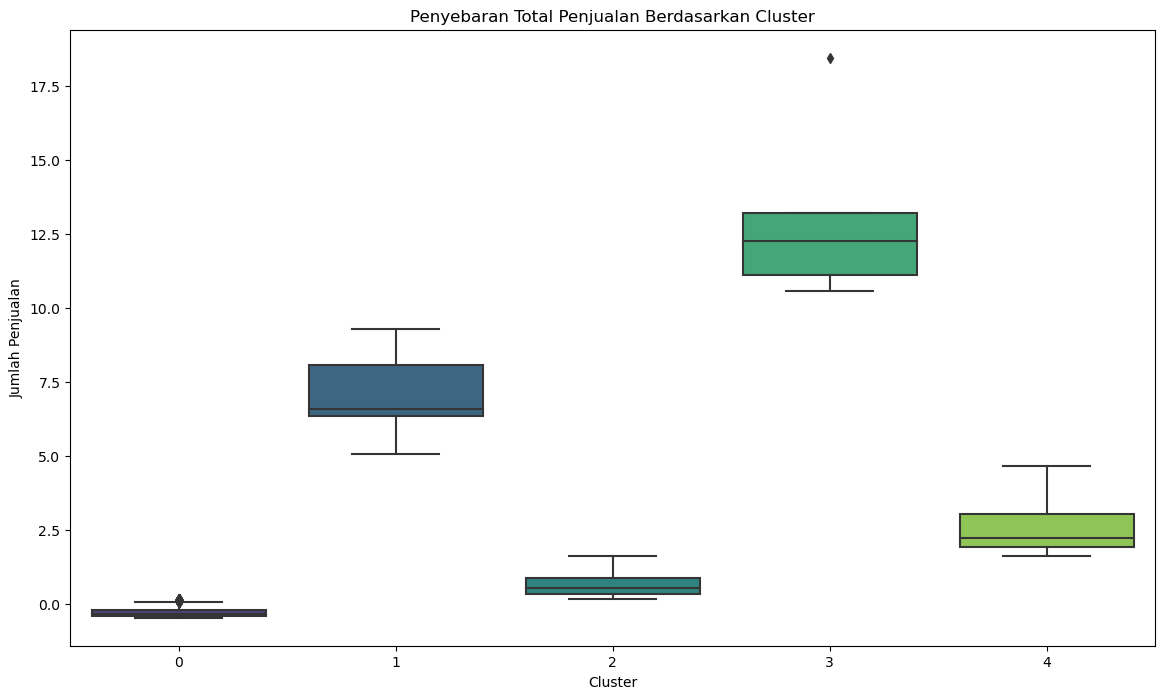

In [36]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=total_penjualan_per_produk, x='Cluster', y='Total_Penjualan_Scaled', palette='viridis')
plt.title('Penyebaran Total Penjualan Berdasarkan Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Penjualan')
plt.show()

In [37]:
# Menggabungkan kategori penjualan ke dataframe utama
df = pd.merge(df, total_penjualan_per_produk[['Nama', 'Cluster']], on='Nama', how='left')

In [38]:
# Menambahkan kolom baru dengan label kategori produk
cluster_labels = {0: 'Penjualan sangat jarang', 1: 'Penjualan Sering', 2: 'Penjualan jarang', 3: 'Penjualan sangat sering',4: 'Penjualan lumayan'}
df['Cluster'] = df['Cluster'].map(cluster_labels)

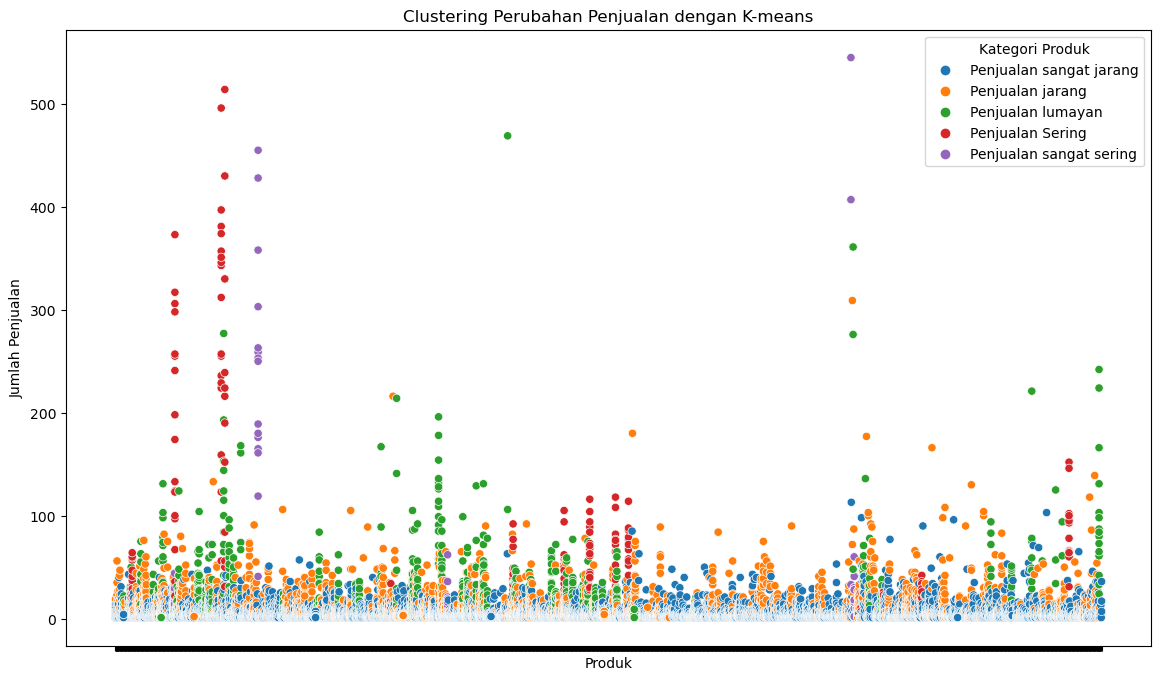

In [39]:
# Visualisasi hasil clustering dengan scatterplot
plt.figure(figsize=(14, 8))
sns.scatterplot(data=df, x='Nama', y='Jumlah', hue='Cluster')
plt.xticks(visible=False)
plt.title('Clustering Perubahan Penjualan dengan K-means')
plt.xlabel('Produk')
plt.ylabel('Jumlah Penjualan')
plt.legend(title='Kategori Produk')
plt.show()

In [40]:
df = one_hot_encoder(df, 'Cluster', keep_first=True)

In [41]:
df

,ID_PENJUALAN_PERBULAN,Kode,Nama,Jumlah,Sat.,Bulan,Tahun,costprice,salesprice1,Total,...,is_holiday,Tanggal,Awal Ramadhan,Hari Raya Idul Fitri,kategori_produk,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering
0,Zul-04-2023-1,013-13,super robot 013-13,13,PCS,4,2023,11125,12500,162500,...,True,2023-04-01,False,True,Penjualan lemah,False,False,False,True,False
1,Zul-12-2023-1,013-13,super robot 013-13,1,PCS,12,2023,11125,12500,12500,...,True,2023-12-01,False,False,Penjualan lemah,False,False,False,True,False
2,Zul-09-2022-1,AK 04,truk molen kontruksi ak04,10,PCS,9,2022,18500,20000,200000,...,False,2022-09-01,False,False,Penjualan lemah,False,True,False,False,False
3,Zul-10-2022-1,AK 04,truk molen kontruksi ak04,18,PCS,10,2022,18500,20000,360000,...,True,2022-10-01,False,False,Penjualan baik,False,True,False,False,False
4,Zul-11-2022-1,AK 04,truk molen kontruksi ak04,8,PCS,11,2022,18500,20000,160000,...,False,2022-11-01,False,False,Penjualan lemah,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,Zul-12-2023-1026,zb096b,kipas angin cas 096,17,PCS,12,2023,18500,19000,323000,...,True,2023-12-01,False,False,Penjualan baik,False,False,False,True,False
13738,Zul-01-2024-872,zb096b,kipas angin cas 096,1,PCS,1,2024,18500,19000,19000,...,True,2024-01-01,False,False,Penjualan lemah,False,False,False,True,False
13739,Zul-10-2023-917,zd135,laser finger ZD135,36,PCS,10,2023,4450,5000,180000,...,False,2023-10-01,False,False,Penjualan baik,False,False,False,True,False
13740,Zul-12-2023-1027,zd135,laser finger ZD135,17,PCS,12,2023,4450,5000,85000,...,True,2023-12-01,False,False,Penjualan baik,False,False,False,True,False


## Data Preprocessing

In [42]:
df= df.rename(columns={'Sat.':'Satuan', 'Awal Ramadhan':"Awal_Ramadhan","Hari Raya Idul Fitri":"Hari_Raya_Idul_Fitri"})

In [43]:
df_proses = df.copy()

In [44]:
df_proses.drop(columns= ['ID_PENJUALAN_PERBULAN','Total', 'Total Laba','Margin','kategori_produk'],inplace=True)

In [45]:
df_proses.columns

Index(['Kode', 'Nama', 'Jumlah', 'Satuan', 'Bulan', 'Tahun', 'costprice',
       'salesprice1', 'is_holiday', 'Tanggal', 'Awal_Ramadhan',
       'Hari_Raya_Idul_Fitri', 'Penjualan Sering', 'Penjualan jarang',
       'Penjualan lumayan', 'Penjualan sangat jarang',
       'Penjualan sangat sering'],
      dtype='object')

In [46]:
df_proses

,Kode,Nama,Jumlah,Satuan,Bulan,Tahun,costprice,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering
0,013-13,super robot 013-13,13,PCS,4,2023,11125,12500,True,2023-04-01,False,True,False,False,False,True,False
1,013-13,super robot 013-13,1,PCS,12,2023,11125,12500,True,2023-12-01,False,False,False,False,False,True,False
2,AK 04,truk molen kontruksi ak04,10,PCS,9,2022,18500,20000,False,2022-09-01,False,False,False,True,False,False,False
3,AK 04,truk molen kontruksi ak04,18,PCS,10,2022,18500,20000,True,2022-10-01,False,False,False,True,False,False,False
4,AK 04,truk molen kontruksi ak04,8,PCS,11,2022,18500,20000,False,2022-11-01,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,zb096b,kipas angin cas 096,17,PCS,12,2023,18500,19000,True,2023-12-01,False,False,False,False,False,True,False
13738,zb096b,kipas angin cas 096,1,PCS,1,2024,18500,19000,True,2024-01-01,False,False,False,False,False,True,False
13739,zd135,laser finger ZD135,36,PCS,10,2023,4450,5000,False,2023-10-01,False,False,False,False,False,True,False
13740,zd135,laser finger ZD135,17,PCS,12,2023,4450,5000,True,2023-12-01,False,False,False,False,False,True,False


### Transformasi Menjadi Numerik

In [47]:
categorical_cols = 'Kode','Nama','Satuan','is_holiday','Tanggal','Awal_Ramadhan','Hari_Raya_Idul_Fitri','Penjualan sangat jarang','Penjualan Sering','Penjualan jarang','Penjualan sangat sering','Penjualan lumayan'
# label encoding
encoder_dict = {}
for col in categorical_cols:
    encoder =LabelEncoder()
    df_proses[col] = encoder.fit_transform(df_proses[col])
    encoder_dict[col] = encoder

In [48]:
df_proses

,Kode,Nama,Jumlah,Satuan,Bulan,Tahun,costprice,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering
0,0,2387,13,4,4,2023,11125,12500,1,7,0,1,0,0,0,1,0
1,0,2387,1,4,12,2023,11125,12500,1,15,0,0,0,0,0,1,0
2,1,2606,10,4,9,2022,18500,20000,0,0,0,0,0,1,0,0,0
3,1,2606,18,4,10,2022,18500,20000,1,1,0,0,0,1,0,0,0
4,1,2606,8,4,11,2022,18500,20000,0,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,2727,1358,17,4,12,2023,18500,19000,1,15,0,0,0,0,0,1,0
13738,2727,1358,1,4,1,2024,18500,19000,1,16,0,0,0,0,0,1,0
13739,2728,1463,36,4,10,2023,4450,5000,0,13,0,0,0,0,0,1,0
13740,2728,1463,17,4,12,2023,4450,5000,1,15,0,0,0,0,0,1,0


In [49]:
df[['Kode','Nama','Satuan','is_holiday','Tanggal','Awal_Ramadhan','Hari_Raya_Idul_Fitri','Penjualan sangat jarang','Penjualan Sering','Penjualan jarang','Penjualan sangat sering','Penjualan lumayan']].dtypes

Kode                               object
Nama                               object
Satuan                             object
is_holiday                           bool
Tanggal                    datetime64[ns]
Awal_Ramadhan                        bool
Hari_Raya_Idul_Fitri                 bool
Penjualan sangat jarang              bool
Penjualan Sering                     bool
Penjualan jarang                     bool
Penjualan sangat sering              bool
Penjualan lumayan                    bool
dtype: object

In [50]:
df_proses[['Kode','Nama','Satuan','is_holiday','Tanggal','Awal_Ramadhan','Hari_Raya_Idul_Fitri','Penjualan sangat jarang','Penjualan Sering','Penjualan jarang','Penjualan sangat sering','Penjualan lumayan']].dtypes

Kode                       int64
Nama                       int64
Satuan                     int64
is_holiday                 int64
Tanggal                    int64
Awal_Ramadhan              int64
Hari_Raya_Idul_Fitri       int64
Penjualan sangat jarang    int64
Penjualan Sering           int64
Penjualan jarang           int64
Penjualan sangat sering    int64
Penjualan lumayan          int64
dtype: object

### Memisahkan data training dan testing

### Pemisahan Data Januari 2024 untuk testing

In [51]:
# Memisahkan data ke dalam df_proses_train dan df_proses_test
df_train = df_proses[((df_proses['Tahun'] == 2022) & (df_proses['Bulan'] >= 9)) | 
              ((df_proses['Tahun'] == 2023) & (df_proses['Bulan'] <= 12))]
df_test = df_proses[(df_proses['Bulan'] == 1) & (df_proses['Tahun'] == 2024)]

In [52]:
df_train

,Kode,Nama,Jumlah,Satuan,Bulan,Tahun,costprice,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering
0,0,2387,13,4,4,2023,11125,12500,1,7,0,1,0,0,0,1,0
1,0,2387,1,4,12,2023,11125,12500,1,15,0,0,0,0,0,1,0
2,1,2606,10,4,9,2022,18500,20000,0,0,0,0,0,1,0,0,0
3,1,2606,18,4,10,2022,18500,20000,1,1,0,0,0,1,0,0,0
4,1,2606,8,4,11,2022,18500,20000,0,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,2726,1364,13,4,9,2023,20000,22000,1,12,0,0,0,0,0,1,0
13736,2727,1358,5,4,11,2023,18500,19000,0,14,0,0,0,0,0,1,0
13737,2727,1358,17,4,12,2023,18500,19000,1,15,0,0,0,0,0,1,0
13739,2728,1463,36,4,10,2023,4450,5000,0,13,0,0,0,0,0,1,0


In [53]:
df_test.shape

(873, 17)

In [54]:
df_proses

,Kode,Nama,Jumlah,Satuan,Bulan,Tahun,costprice,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering
0,0,2387,13,4,4,2023,11125,12500,1,7,0,1,0,0,0,1,0
1,0,2387,1,4,12,2023,11125,12500,1,15,0,0,0,0,0,1,0
2,1,2606,10,4,9,2022,18500,20000,0,0,0,0,0,1,0,0,0
3,1,2606,18,4,10,2022,18500,20000,1,1,0,0,0,1,0,0,0
4,1,2606,8,4,11,2022,18500,20000,0,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,2727,1358,17,4,12,2023,18500,19000,1,15,0,0,0,0,0,1,0
13738,2727,1358,1,4,1,2024,18500,19000,1,16,0,0,0,0,0,1,0
13739,2728,1463,36,4,10,2023,4450,5000,0,13,0,0,0,0,0,1,0
13740,2728,1463,17,4,12,2023,4450,5000,1,15,0,0,0,0,0,1,0


## Corelation Matrix

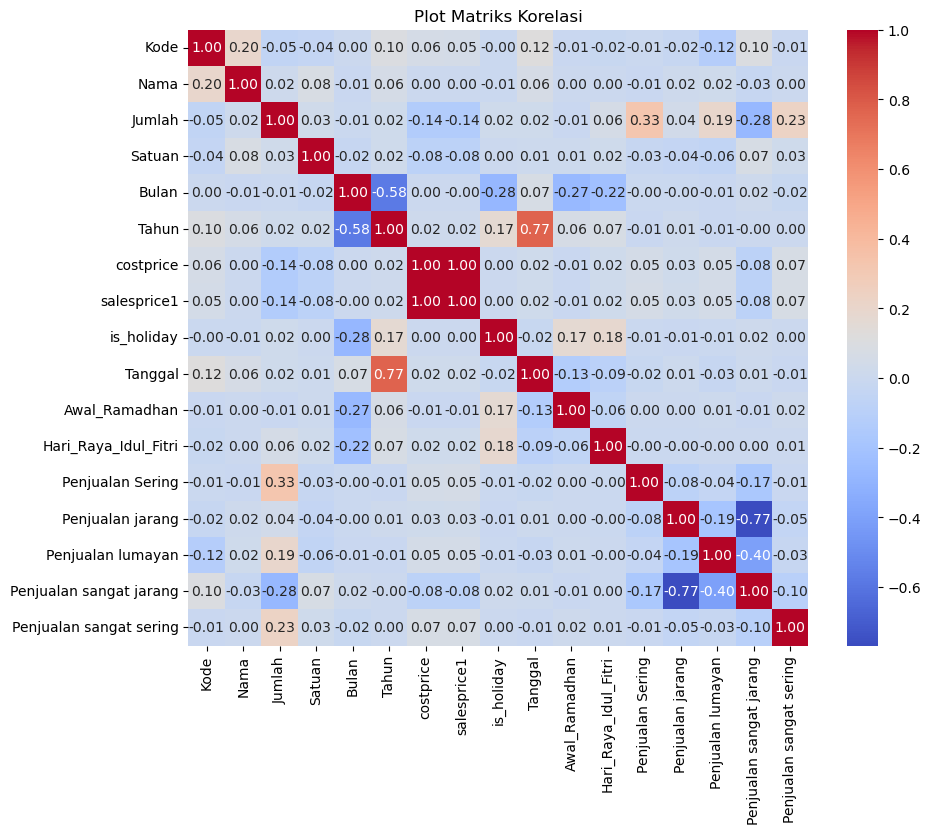

In [55]:
# Menghitung matriks korelasi
correlation_matrix = df_proses.corr()

# Membuat plot matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Plot Matriks Korelasi')
plt.show()

In [56]:
df_proses

,Kode,Nama,Jumlah,Satuan,Bulan,Tahun,costprice,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering
0,0,2387,13,4,4,2023,11125,12500,1,7,0,1,0,0,0,1,0
1,0,2387,1,4,12,2023,11125,12500,1,15,0,0,0,0,0,1,0
2,1,2606,10,4,9,2022,18500,20000,0,0,0,0,0,1,0,0,0
3,1,2606,18,4,10,2022,18500,20000,1,1,0,0,0,1,0,0,0
4,1,2606,8,4,11,2022,18500,20000,0,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,2727,1358,17,4,12,2023,18500,19000,1,15,0,0,0,0,0,1,0
13738,2727,1358,1,4,1,2024,18500,19000,1,16,0,0,0,0,0,1,0
13739,2728,1463,36,4,10,2023,4450,5000,0,13,0,0,0,0,0,1,0
13740,2728,1463,17,4,12,2023,4450,5000,1,15,0,0,0,0,0,1,0


# Featur Engineering

In [57]:
df_proses

,Kode,Nama,Jumlah,Satuan,Bulan,Tahun,costprice,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering
0,0,2387,13,4,4,2023,11125,12500,1,7,0,1,0,0,0,1,0
1,0,2387,1,4,12,2023,11125,12500,1,15,0,0,0,0,0,1,0
2,1,2606,10,4,9,2022,18500,20000,0,0,0,0,0,1,0,0,0
3,1,2606,18,4,10,2022,18500,20000,1,1,0,0,0,1,0,0,0
4,1,2606,8,4,11,2022,18500,20000,0,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13737,2727,1358,17,4,12,2023,18500,19000,1,15,0,0,0,0,0,1,0
13738,2727,1358,1,4,1,2024,18500,19000,1,16,0,0,0,0,0,1,0
13739,2728,1463,36,4,10,2023,4450,5000,0,13,0,0,0,0,0,1,0
13740,2728,1463,17,4,12,2023,4450,5000,1,15,0,0,0,0,0,1,0


# Pemodelan Regresi Linear

## Pendefenisian Variabel X dan y

### Feature Selection Linear Regression

In [58]:
X_train = df_train.drop(columns=['Jumlah','costprice'])
X_test = df_test.drop(columns=['Jumlah','costprice'])
y_test = df_test['Jumlah']
y_train = df_train['Jumlah']

In [59]:
X_train

,Kode,Nama,Satuan,Bulan,Tahun,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering
0,0,2387,4,4,2023,12500,1,7,0,1,0,0,0,1,0
1,0,2387,4,12,2023,12500,1,15,0,0,0,0,0,1,0
2,1,2606,4,9,2022,20000,0,0,0,0,0,1,0,0,0
3,1,2606,4,10,2022,20000,1,1,0,0,0,1,0,0,0
4,1,2606,4,11,2022,20000,0,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,2726,1364,4,9,2023,22000,1,12,0,0,0,0,0,1,0
13736,2727,1358,4,11,2023,19000,0,14,0,0,0,0,0,1,0
13737,2727,1358,4,12,2023,19000,1,15,0,0,0,0,0,1,0
13739,2728,1463,4,10,2023,5000,0,13,0,0,0,0,0,1,0


In [60]:
X_test

,Kode,Nama,Satuan,Bulan,Tahun,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering
37,4,1798,4,1,2024,18000,1,16,0,0,0,0,0,1,0
41,5,2348,4,1,2024,12000,1,16,0,0,0,1,0,0,0
68,12,2119,4,1,2024,11500,1,16,0,0,0,1,0,0,0
74,13,2115,4,1,2024,11500,1,16,0,0,0,1,0,0,0
86,16,1659,4,1,2024,12500,1,16,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13675,2712,2703,4,1,2024,10000,1,16,0,0,0,1,0,0,0
13716,2721,2708,4,1,2024,4000,1,16,0,0,0,0,1,0,0
13730,2722,1032,4,1,2024,38000,1,16,0,0,0,1,0,0,0
13738,2727,1358,4,1,2024,19000,1,16,0,0,0,0,0,1,0


In [61]:
y_train

0        13
1         1
2        10
3        18
4         8
         ..
13735    13
13736     5
13737    17
13739    36
13740    17
Name: Jumlah, Length: 12869, dtype: int64

In [62]:
y_test

37        8
41       14
68       18
74       11
86        6
         ..
13675    17
13716    98
13730     3
13738     1
13741     7
Name: Jumlah, Length: 873, dtype: int64

In [63]:
X_train.columns

Index(['Kode', 'Nama', 'Satuan', 'Bulan', 'Tahun', 'salesprice1', 'is_holiday',
       'Tanggal', 'Awal_Ramadhan', 'Hari_Raya_Idul_Fitri', 'Penjualan Sering',
       'Penjualan jarang', 'Penjualan lumayan', 'Penjualan sangat jarang',
       'Penjualan sangat sering'],
      dtype='object')

In [64]:
# Inisialisasi dan fit model Linear Regression
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model_linear.predict(X_test)

In [66]:
# Evaluasi kinerja model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 311.2693745825565
Root Mean Squared Error (RMSE): 17.64282785107185
Mean Absolute Error (MAE): 8.283321336668768
R-squared (R2): 0.3708625810023466


## Feature Importance Linear Regression

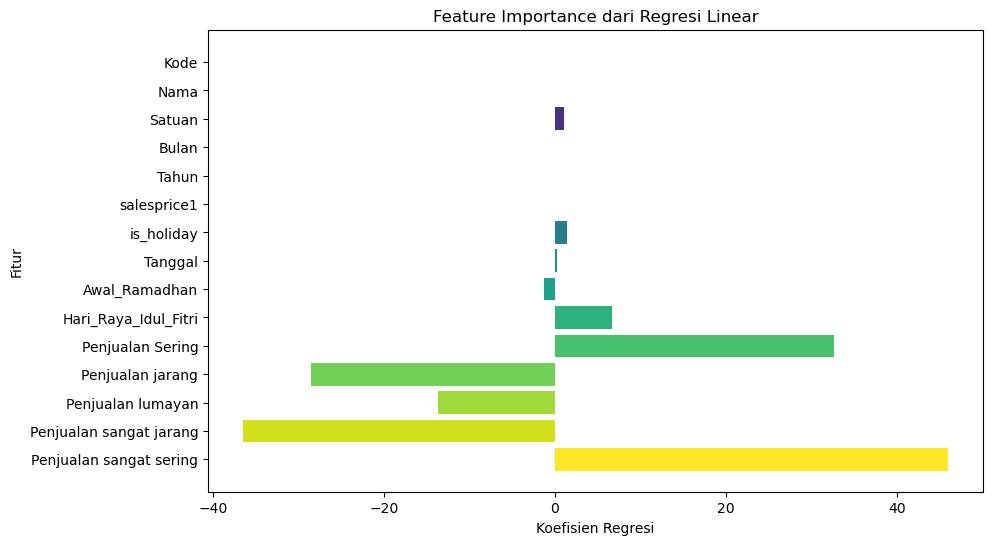

In [67]:
# Mendapatkan koefisien regresi (feature importance)
importance = model_linear.coef_

# Membuat bar plot untuk feature importance dengan warna-warni
colors = plt.cm.viridis(np.linspace(0, 1, len(importance)))

plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(importance)), importance, align='center', color=colors)
plt.yticks(np.arange(len(importance)), X_train.columns)
plt.xlabel('Koefisien Regresi')
plt.ylabel('Fitur')
plt.title('Feature Importance dari Regresi Linear')
plt.gca().invert_yaxis()
plt.show()

In [68]:
# Menyusun koefisien menjadi DataFrame (opsional)
feature_importances = pd.DataFrame(importance, index=X_train.columns, columns=['importance'])
feature_importances.sort_values(by='importance', inplace=True)
print(feature_importances)

                         importance
Penjualan sangat jarang  -36.430301
Penjualan jarang         -28.563879
Penjualan lumayan        -13.686162
Awal_Ramadhan             -1.216106
salesprice1               -0.000209
Kode                      -0.000135
Nama                       0.000266
Tahun                      0.015986
Bulan                      0.083109
Tanggal                    0.274938
Satuan                     1.107417
is_holiday                 1.419576
Hari_Raya_Idul_Fitri       6.694406
Penjualan Sering          32.708053
Penjualan sangat sering   45.972289


In [69]:
df_results = X_test.copy()
df_results['Actual'] = y_test
df_results['Predicted'] = y_pred

In [70]:
actual = df_results['Actual'].values
predicted = df_results['Predicted'].values

In [71]:
# Mendefinisikan metrik evaluasi
scoring = {
    'MAE': make_scorer(mean_absolute_error),
    'RMSE': make_scorer(lambda y_true, y_pred: mean_squared_error(y_true, y_pred, squared=False)),
    'R2': make_scorer(r2_score)
}

# Melakukan K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)
results = {}
for metric_name, scorer in scoring.items():
    scores = cross_val_score(model_linear, X_test, y_test, cv=kf, scoring=scorer)
    results[metric_name] = scores.mean()

print("Cross-Validation Results (Regresi Linear):")
for metric_name, score in results.items():
    print(f"{metric_name}: {score:.4f}")

Cross-Validation Results (Regresi Linear):
MAE: 8.0178
RMSE: 17.9486
R2: 0.2978


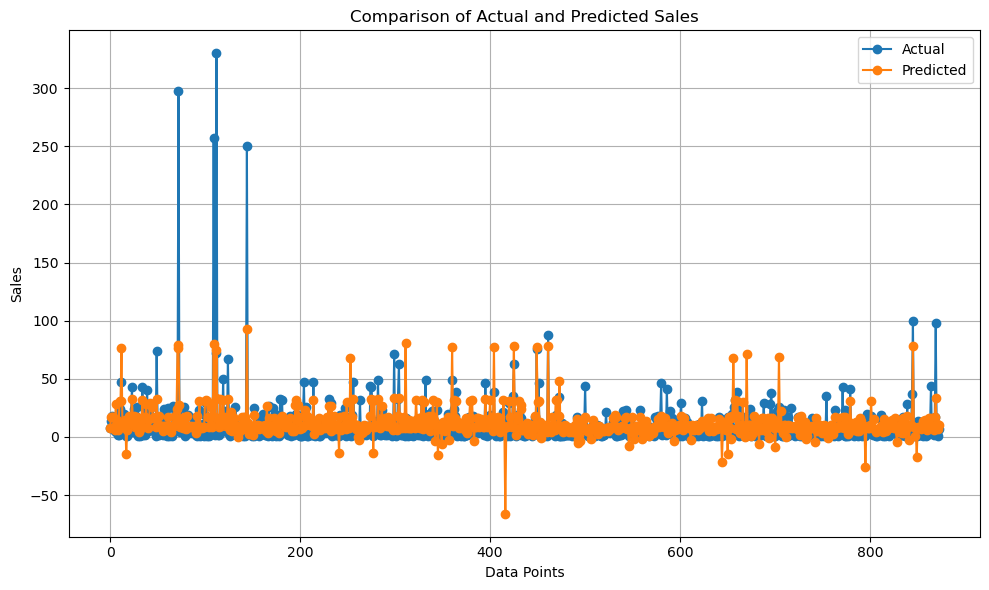

In [72]:
# Membuat line plot
plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual', marker='o', linestyle='-')
plt.plot(predicted, label='Predicted', marker='o', linestyle='-')
plt.title('Comparison of Actual and Predicted Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [73]:
# Hitung selisih absolut antara jumlah sebenarnya dan hasil prediksi untuk semua data yang diuji
df_results['Selisih'] = abs(df_results['Actual'] - df_results['Predicted'])

In [74]:
# Tentukan ambang batas untuk menentukan apakah perbedaan dianggap jauh atau mendekati
threshold = 7  # Misalnya, anggap perbedaan di bawah 5 adalah mendekati

# Tentukan kategori untuk setiap baris berdasarkan selisih
df_results['Kategori'] = 'Mendekati'
df_results.loc[df_results['Selisih'] > threshold, 'Kategori'] = 'Jauh'


In [75]:
df_results['Nama'] = df_proses['Nama']

In [76]:
# Tampilkan beberapa baris pertama dari DataFrame hasil prediksi
df_results[['Kategori', 'Nama', 'Actual', 'Predicted', 'Selisih']]

,Kategori,Nama,Actual,Predicted,Selisih
37,Mendekati,1798,8,7.657538,0.342462
41,Mendekati,2348,14,16.922499,2.922499
68,Mendekati,2119,18,16.964892,1.035108
74,Mendekati,2115,11,16.963691,5.963691
86,Mendekati,1659,6,8.766692,2.766692
...,...,...,...,...,...
13675,Mendekati,2703,17,17.068471,0.068471
13716,Jauh,2708,98,33.198457,64.801543
13730,Jauh,1032,3,10.778579,7.778579
13738,Mendekati,1358,1,6.963480,5.963480


In [77]:
df_results.describe()

,Kode,Nama,Satuan,Bulan,Tahun,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering,Actual,Predicted,Selisih
count,873.000000,873.000000,873.000000,873.0,873.0,873.000000,873.0,873.0,873.0,873.0,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000,873.000000
mean,1327.018328,1351.504009,3.731959,1.0,2024.0,20703.894616,1.0,16.0,0.0,0.0,0.017182,0.249714,0.084765,0.644903,0.003436,10.211913,11.861982,8.283321
std,806.102880,781.532573,0.877391,0.0,0.0,25883.676065,0.0,0.0,0.0,0.0,0.130024,0.433095,0.278692,0.478817,0.058554,22.255857,12.236232,15.586348
min,4.000000,1.000000,0.000000,1.0,2024.0,2000.000000,1.0,16.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-66.090390,0.005669
25%,612.000000,693.000000,4.000000,1.0,2024.0,10000.000000,1.0,16.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,7.272640,2.853546
50%,1332.000000,1342.000000,4.000000,1.0,2024.0,14000.000000,1.0,16.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,5.000000,9.042817,5.692394
75%,2047.000000,2008.000000,4.000000,1.0,2024.0,22000.000000,1.0,16.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,11.000000,14.975174,8.641740
max,2728.000000,2726.000000,4.000000,1.0,2024.0,480000.000000,1.0,16.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,330.000000,92.400734,255.104193


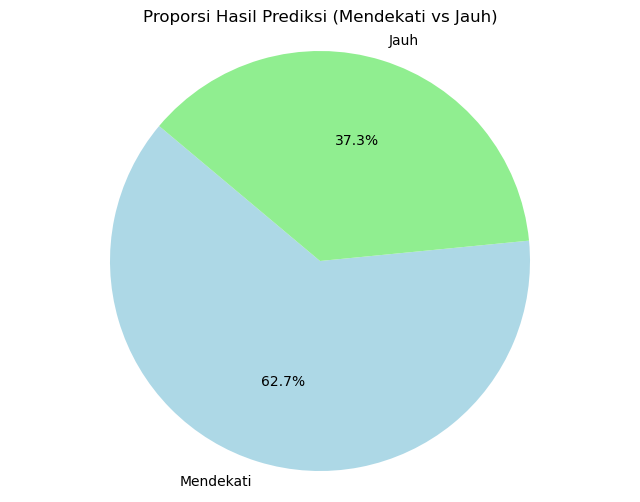

In [78]:
# Hitung jumlah produk yang hasil prediksinya mendekati dan jauh
count_kategori = df_results['Kategori'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(count_kategori, labels=count_kategori.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=140)
plt.title('Proporsi Hasil Prediksi (Mendekati vs Jauh)')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

# Random Forest Regression

In [79]:
X_train = df_train.drop(columns=['Jumlah','costprice'])
X_test = df_test.drop(columns=['Jumlah','costprice'])
y_test = df_test['Jumlah']
y_train = df_train['Jumlah']

In [80]:
X_train

,Kode,Nama,Satuan,Bulan,Tahun,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering
0,0,2387,4,4,2023,12500,1,7,0,1,0,0,0,1,0
1,0,2387,4,12,2023,12500,1,15,0,0,0,0,0,1,0
2,1,2606,4,9,2022,20000,0,0,0,0,0,1,0,0,0
3,1,2606,4,10,2022,20000,1,1,0,0,0,1,0,0,0
4,1,2606,4,11,2022,20000,0,2,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13735,2726,1364,4,9,2023,22000,1,12,0,0,0,0,0,1,0
13736,2727,1358,4,11,2023,19000,0,14,0,0,0,0,0,1,0
13737,2727,1358,4,12,2023,19000,1,15,0,0,0,0,0,1,0
13739,2728,1463,4,10,2023,5000,0,13,0,0,0,0,0,1,0


In [81]:
X_train.columns

Index(['Kode', 'Nama', 'Satuan', 'Bulan', 'Tahun', 'salesprice1', 'is_holiday',
       'Tanggal', 'Awal_Ramadhan', 'Hari_Raya_Idul_Fitri', 'Penjualan Sering',
       'Penjualan jarang', 'Penjualan lumayan', 'Penjualan sangat jarang',
       'Penjualan sangat sering'],
      dtype='object')

In [82]:
y_pred.shape

(873,)

In [83]:
# Inisialisasi dan fit model Random Forest Regressor
model_rfr = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)
model_rfr.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [84]:
# Lakukan prediksi
y_pred = model_rfr.predict(X_test)

In [85]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 56.24671385011589
Root Mean Squared Error (RMSE): 7.499780920141327
Mean Absolute Error (MAE): 5.078521931987357
R-squared (R2): 0.8863141854985931


In [86]:
# Menghitung feature importance
importance = model_rfr.feature_importances_

# Membuat DataFrame untuk menampilkan feature importance
feature_importance_df = pd.DataFrame({
    'Fitur': X_train.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

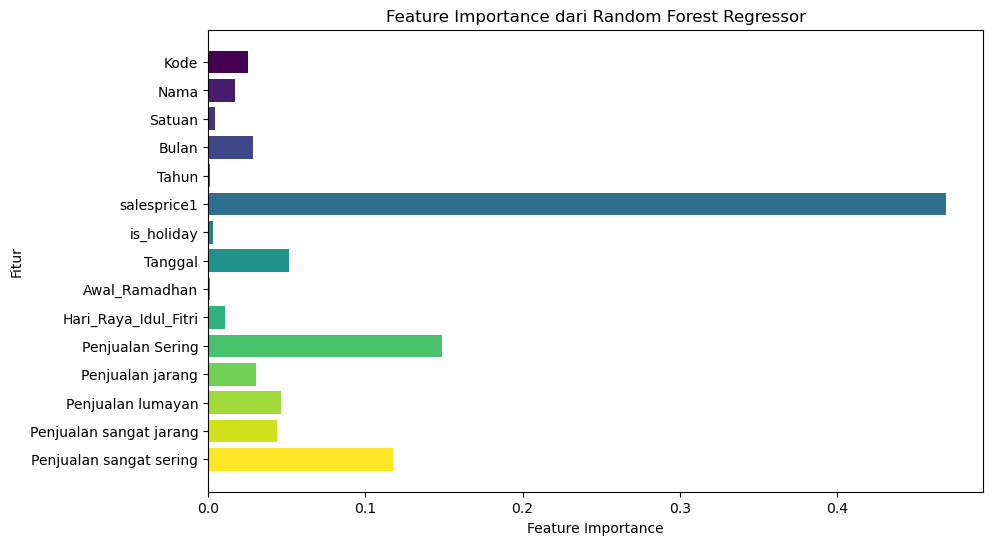

In [87]:
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(importance)), importance, align='center', color=colors)
plt.yticks(np.arange(len(importance)), X_train.columns)
plt.xlabel('Feature Importance')
plt.ylabel('Fitur')
plt.title('Feature Importance dari Random Forest Regressor')
plt.gca().invert_yaxis()
plt.show()

In [90]:
print(feature_importance_df)

                      Fitur  Importance
5               salesprice1    0.469174
10         Penjualan Sering    0.148674
14  Penjualan sangat sering    0.117810
7                   Tanggal    0.051571
12        Penjualan lumayan    0.046541
13  Penjualan sangat jarang    0.043832
11         Penjualan jarang    0.030232
3                     Bulan    0.028500
0                      Kode    0.025440
1                      Nama    0.017405
9      Hari_Raya_Idul_Fitri    0.010645
2                    Satuan    0.004393
6                is_holiday    0.003289
4                     Tahun    0.001482
8             Awal_Ramadhan    0.001011


In [91]:
# Menambahkan hasil prediksi ke DataFrame
df_results = X_test.copy()
df_results['Nama'] = df['Nama']
df_results['Satuan'] = df['Satuan']
df_results['Jumlah_Penjualan_Actual'] = y_test
df_results['Jumlah_Penjualan_Predicted'] = y_pred

In [92]:
actual = df_results['Jumlah_Penjualan_Actual'].values

In [93]:
predicted = df_results['Jumlah_Penjualan_Predicted'].values

In [94]:
# Hitung selisih absolut antara jumlah sebenarnya dan hasil prediksi untuk semua data yang diuji
df_results['Selisih'] = abs(df_results['Jumlah_Penjualan_Actual'] - df_results['Jumlah_Penjualan_Predicted'])

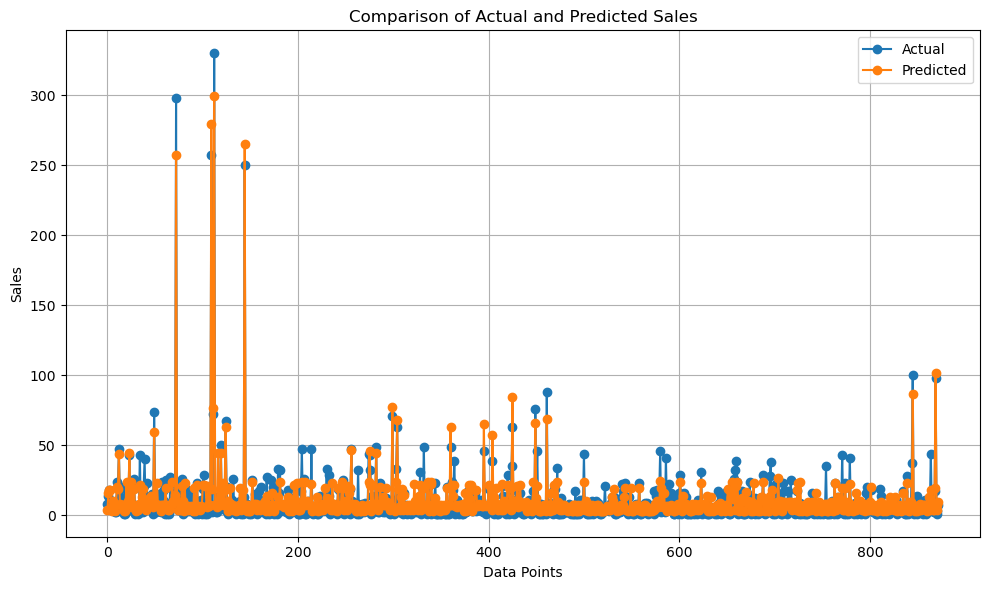

In [95]:
# Membuat line plot
plt.figure(figsize=(10, 6))
plt.plot(actual, label='Actual', marker='o', linestyle='-')
plt.plot(predicted, label='Predicted', marker='o', linestyle='-')
plt.title('Comparison of Actual and Predicted Sales')
plt.xlabel('Data Points')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [96]:
# Tentukan ambang batas untuk menentukan apakah perbedaan dianggap jauh atau mendekati
threshold = 7  # Misalnya, anggap perbedaan di bawah 5 adalah mendekati

# Tentukan kategori untuk setiap baris berdasarkan selisih
df_results['Kategori'] = 'Mendekati'
df_results.loc[df_results['Selisih'] > threshold, 'Kategori'] = 'Jauh'

# Tampilkan beberapa baris pertama dari DataFrame hasil prediksi
df_results[['Kategori', 'Nama', 'Jumlah_Penjualan_Actual', 'Jumlah_Penjualan_Predicted', 'Selisih']]


,Kategori,Nama,Jumlah_Penjualan_Actual,Jumlah_Penjualan_Predicted,Selisih
37,Mendekati,penghapus lipstik,8,3.435704,4.564296
41,Mendekati,stiker panjang 001-2020,14,16.071718,2.071718
68,Mendekati,sedan poli 02021-2,18,17.884165,0.115835
74,Mendekati,sedan lamborgini 02026-1,11,17.884165,6.884165
86,Mendekati,mobil pikup rkc02151-1,6,6.110002,0.110002
...,...,...,...,...,...
13675,Mendekati,yoyo 3in 1,17,19.141875,2.141875
13716,Mendekati,yoyo kantong,98,101.251011,3.251011
13730,Mendekati,honda spinggo yy0186,3,6.916936,3.916936
13738,Mendekati,kipas angin cas 096,1,3.557106,2.557106


In [97]:
df_results = df_results.sort_values(by='Selisih', ascending=False)

In [98]:
df_results

,Kode,Nama,Satuan,Bulan,Tahun,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering,Jumlah_Penjualan_Actual,Jumlah_Penjualan_Predicted,Selisih,Kategori
1087,161,balon gas,PCS,1,2024,3500,1,16,0,0,1,0,0,0,0,298,257.678385,40.321615,Jauh
9995,1798,pop it mini b/o,PCS,1,2024,10000,1,16,0,0,0,0,0,1,0,41,6.743182,34.256818,Jauh
1902,305,dorongan ayam OCT 7003,PCS,1,2024,8000,1,16,0,0,0,0,1,0,0,10,44.247668,34.247668,Jauh
734,118,happy bus oct5330,PCS,1,2024,12000,1,16,0,0,0,0,0,1,0,40,5.851581,34.148419,Jauh
1848,294,gambar,KDI,1,2024,4500,1,16,0,0,1,0,0,0,0,330,299.587272,30.412728,Jauh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11161,2102,jarum pentul mb01w,PCS,1,2024,36000,1,16,0,0,0,0,0,1,0,3,3.036953,0.036953,Mendekati
10235,1863,ikat kepala palestina 20 pcs,PCS,1,2024,26000,1,16,0,0,0,0,0,1,0,3,3.036953,0.036953,Mendekati
8694,1461,batu domino kantong,PCS,1,2024,26500,1,16,0,0,0,0,0,1,0,3,3.036953,0.036953,Mendekati
6684,1134,Gerobak eskrim MP 013,PCS,1,2024,67500,1,16,0,0,0,0,0,1,0,3,3.016488,0.016488,Mendekati


In [99]:
df_results[(df_results['Kategori'] == 'Jauh')]

,Kode,Nama,Satuan,Bulan,Tahun,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering,Jumlah_Penjualan_Actual,Jumlah_Penjualan_Predicted,Selisih,Kategori
1087,161,balon gas,PCS,1,2024,3500,1,16,0,0,1,0,0,0,0,298,257.678385,40.321615,Jauh
9995,1798,pop it mini b/o,PCS,1,2024,10000,1,16,0,0,0,0,0,1,0,41,6.743182,34.256818,Jauh
1902,305,dorongan ayam OCT 7003,PCS,1,2024,8000,1,16,0,0,0,0,1,0,0,10,44.247668,34.247668,Jauh
734,118,happy bus oct5330,PCS,1,2024,12000,1,16,0,0,0,0,0,1,0,40,5.851581,34.148419,Jauh
1848,294,gambar,KDI,1,2024,4500,1,16,0,0,1,0,0,0,0,330,299.587272,30.412728,Jauh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2335,382,ember pantai oct7620,PCS,1,2024,12000,1,16,0,0,0,0,0,1,0,13,5.851581,7.148419,Jauh
4892,857,blok haha kantong,PCS,1,2024,10000,1,16,0,0,0,1,0,0,0,12,19.141875,7.141875,Jauh
12544,2430,poster 6,PCS,1,2024,9000,1,16,0,0,0,0,0,1,0,1,8.103322,7.103322,Jauh
919,134,bola smile tiup besar,PCS,1,2024,9000,1,16,0,0,0,0,0,1,0,14,6.916376,7.083624,Jauh


In [100]:
df_results.sort_values(by='Selisih',ascending=False)

,Kode,Nama,Satuan,Bulan,Tahun,salesprice1,is_holiday,Tanggal,Awal_Ramadhan,Hari_Raya_Idul_Fitri,Penjualan Sering,Penjualan jarang,Penjualan lumayan,Penjualan sangat jarang,Penjualan sangat sering,Jumlah_Penjualan_Actual,Jumlah_Penjualan_Predicted,Selisih,Kategori
1087,161,balon gas,PCS,1,2024,3500,1,16,0,0,1,0,0,0,0,298,257.678385,40.321615,Jauh
9995,1798,pop it mini b/o,PCS,1,2024,10000,1,16,0,0,0,0,0,1,0,41,6.743182,34.256818,Jauh
1902,305,dorongan ayam OCT 7003,PCS,1,2024,8000,1,16,0,0,0,0,1,0,0,10,44.247668,34.247668,Jauh
734,118,happy bus oct5330,PCS,1,2024,12000,1,16,0,0,0,0,0,1,0,40,5.851581,34.148419,Jauh
1848,294,gambar,KDI,1,2024,4500,1,16,0,0,1,0,0,0,0,330,299.587272,30.412728,Jauh
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11161,2102,jarum pentul mb01w,PCS,1,2024,36000,1,16,0,0,0,0,0,1,0,3,3.036953,0.036953,Mendekati
10235,1863,ikat kepala palestina 20 pcs,PCS,1,2024,26000,1,16,0,0,0,0,0,1,0,3,3.036953,0.036953,Mendekati
8694,1461,batu domino kantong,PCS,1,2024,26500,1,16,0,0,0,0,0,1,0,3,3.036953,0.036953,Mendekati
6684,1134,Gerobak eskrim MP 013,PCS,1,2024,67500,1,16,0,0,0,0,0,1,0,3,3.016488,0.016488,Mendekati


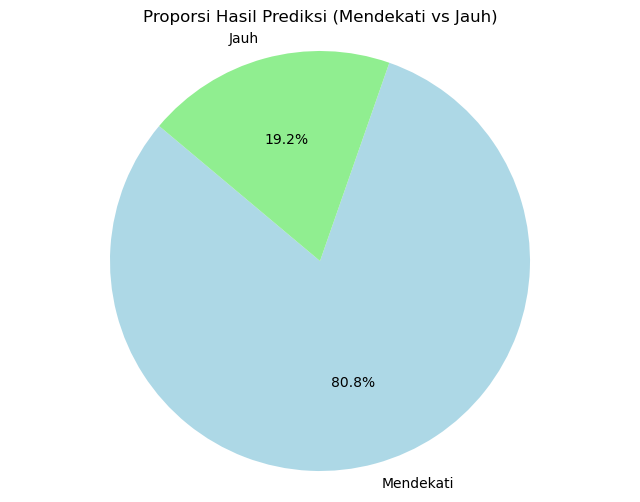

In [101]:
# Hitung jumlah produk yang hasil prediksinya mendekati dan jauh
count_kategori = df_results['Kategori'].value_counts()

# Buat pie chart
plt.figure(figsize=(8, 6))
plt.pie(count_kategori, labels=count_kategori.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'], startangle=140)
plt.title('Proporsi Hasil Prediksi (Mendekati vs Jauh)')
plt.axis('equal')  # Memastikan pie chart berbentuk lingkaran
plt.show()

In [102]:
# Simpan model dan encoder
joblib.dump(model_rfr, 'model_rfr.pkl')

['model_rfr.pkl']

In [103]:
joblib.dump(encoder_dict, 'encoder_dict.pkl')

['encoder_dict.pkl']